In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('house_price.csv')
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [5]:
#EDA
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [7]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [9]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [11]:
Location=df.groupby('location')

In [13]:
Location[['total_sqft','price']].mean().sort_values(by='price',ascending=False)

,total_sqft,price
location,,
Cunningham Road,3904.769231,824.384615
Kodihalli,2604.400000,367.733333
Malleshwaram,2245.771930,359.408772
Benson Town,2510.674667,346.743333
HAL 2nd Stage,1676.000000,339.272727
...,...,...
Kammasandra,1080.500000,38.054483
Anekal,993.708333,37.944444
Kereguddadahalli,1029.625000,35.818750


<Axes: xlabel='price', ylabel='Density'>

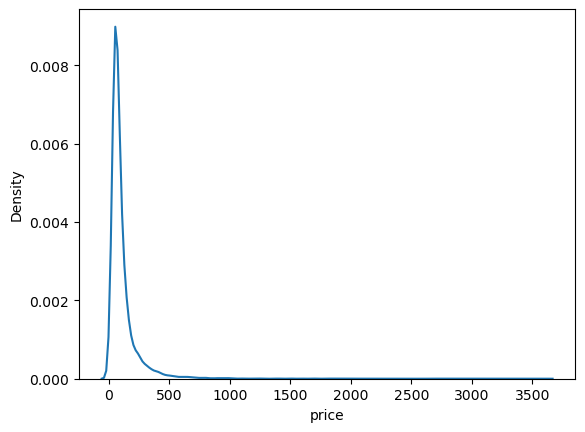

In [15]:
#2
#Seeing outliers
sns.kdeplot(df['price'])

<Axes: >

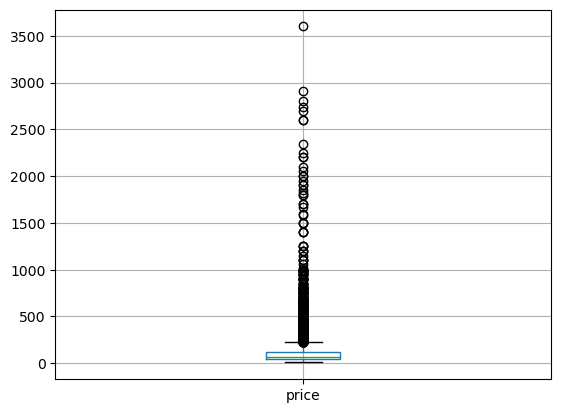

In [17]:
#seeing outliers more clearly
df[['price']].boxplot()

<Axes: >

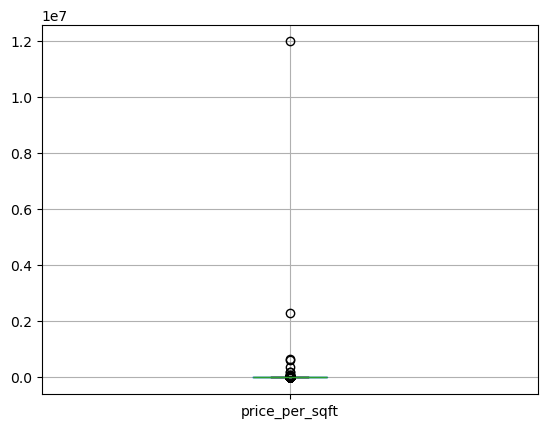

In [19]:
df[['price_per_sqft']].boxplot()

In [21]:
#using Z_SCORE
upper_price=df['price'].mean()+3*df['price'].std()
lower_price=df['price'].mean()-3*df['price'].std()
print("Upper",upper_price)
print("Loer",lower_price)

Upper 559.8041631858049
Loer -335.2518078827746


In [23]:
upper=df['price_per_sqft'].mean()+3*df['price_per_sqft'].std()
lower=df['price_per_sqft'].mean()-3*df['price_per_sqft'].std()
print("Upper",upper)
print("Loer",lower)

Upper 328101.8177267496
Loer -312261.1442419011


In [25]:
df2=df.loc[(df['price']<upper_price)&(df['price']>lower_price)]
print("With Outliers:",len(df))
print("After Z-Score:",len(df2))


With Outliers: 13200
After Z-Score: 13008


<Axes: >

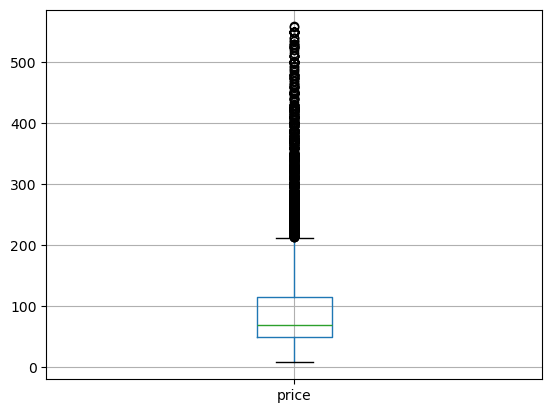

In [27]:
df2[['price']].boxplot()

In [29]:
#Removing using IQR
q1=df['price'].quantile(0.25)
q2=df['price'].quantile(0.75)

In [31]:
iqr=q2-q1
upper_price_limit=q2+(1.5*iqr)
lower_price_limit=q1-(1.5*iqr)
print("upper Pirce:",upper_price_limit)
print("Lower Price:",lower_price_limit)

upper Pirce: 225.0
Lower Price: -55.0


In [33]:
#removing outliers
df3=df.loc[(df['price']<upper_price_limit)&(df['price']>lower_price_limit)]
print("With Outliers:",len(df))
print("After IQR:",len(df3))

With Outliers: 13200
After IQR: 11908


<Axes: >

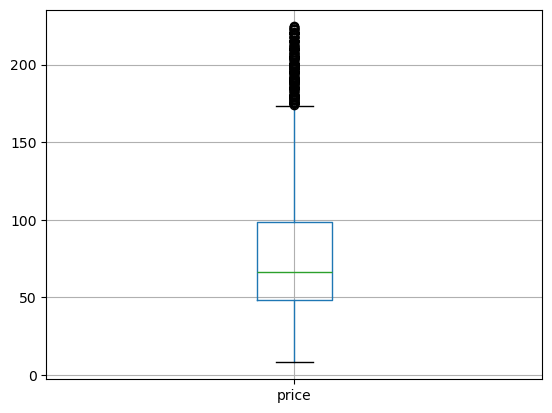

In [35]:
df3[['price']].boxplot()
#IQR seems better than Z-score in removing outliers related to Price.

In [37]:
#percentile method
upper_percent=df['price'].quantile(0.95)
lower_percent=df['price'].quantile(0.05)
print("95%:",upper_percent)
print("5%",lower_percent)

95%: 320.0
5% 31.99


In [39]:
#removing outliers
df4=df.loc[(df['price']<upper_percent)&(df['price']>lower_percent)]
print("Total count:",len(df))
print("After percentile",len(df4))


Total count: 13200
After percentile 11874


<Axes: >

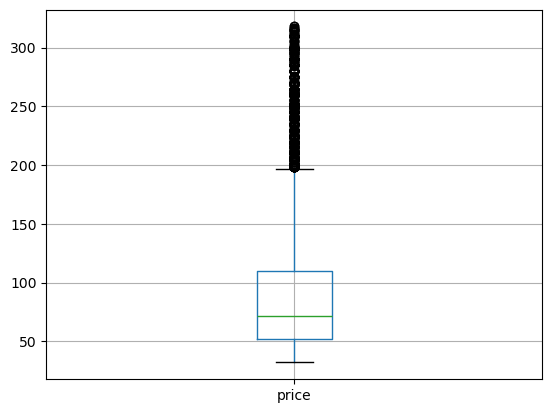

In [41]:
df4[['price']].boxplot()

In [43]:
#While looking at the 3 methods applied,the IQR method seems better performing than other 2.

<Axes: xlabel='price_per_sqft', ylabel='Density'>

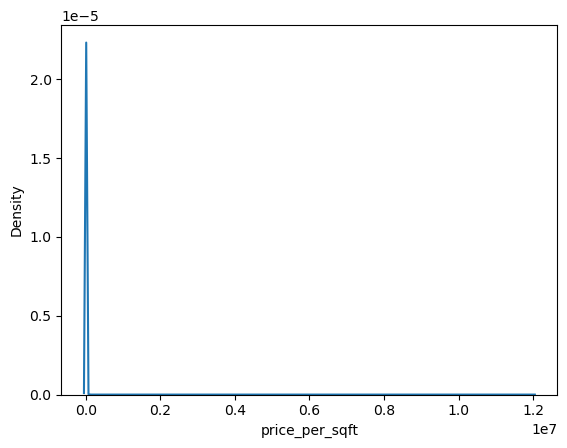

In [45]:
#4-checking Nomrality of Price_per-sqft
sns.kdeplot(df['price_per_sqft'])

In [47]:
from scipy.stats import skew,kurtosis
print(skew(df['price_per_sqft']))
print(kurtosis(df['price_per_sqft']))


108.26875024325159
12090.633538860382


In [49]:
import numpy as np
transformd_data=np.log(df['price_per_sqft'])
print(skew(transformd_data))
print(kurtosis(transformd_data))


1.3997035748119977
9.199636085376468


<Axes: xlabel='price_per_sqft', ylabel='Density'>

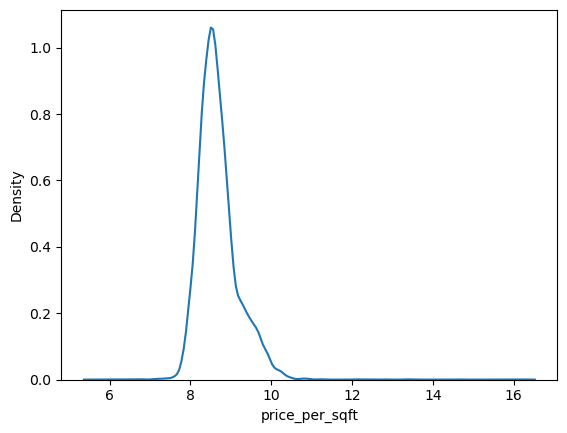

In [51]:
sns.kdeplot(transformd_data)

In [53]:
#Correlation and heat map
ab=df[['total_sqft','bath','price','bhk','price_per_sqft']].corr()
ab

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


<Axes: >

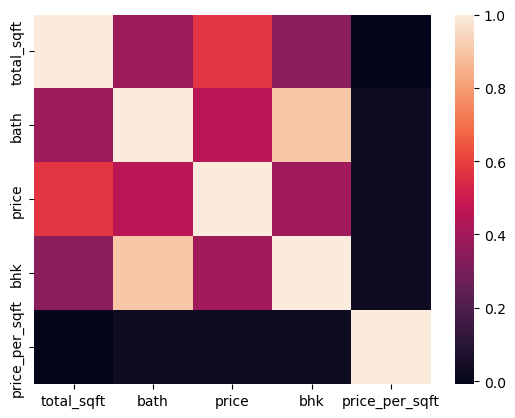

In [55]:
sns.heatmap(ab)

<Axes: >

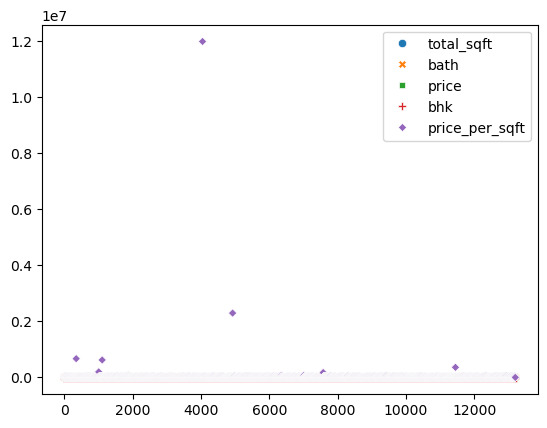

In [57]:
ab=df[['total_sqft','bath','price','bhk','price_per_sqft']]
sns.scatterplot(data=df)

<Axes: xlabel='bhk', ylabel='bath'>

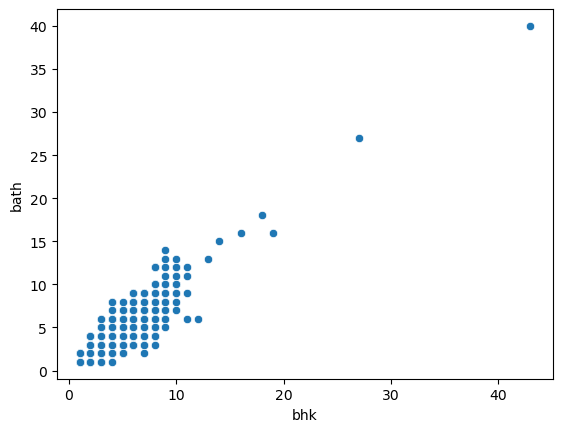

In [59]:
#relation between no of bedrooms and bathroom.
a=df['bath']
b=df['bhk']
sns.scatterplot(x=b,y=a)

<Axes: xlabel='bhk', ylabel='price'>

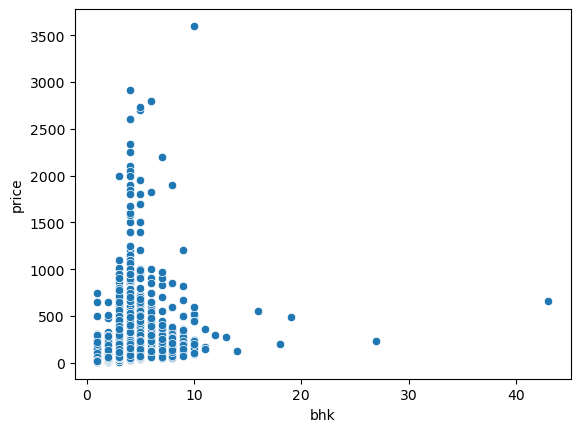

In [61]:
#relation between price and bhk
sns.scatterplot(x=df['bhk'],y=df['price'])

<Axes: xlabel='total_sqft', ylabel='price'>

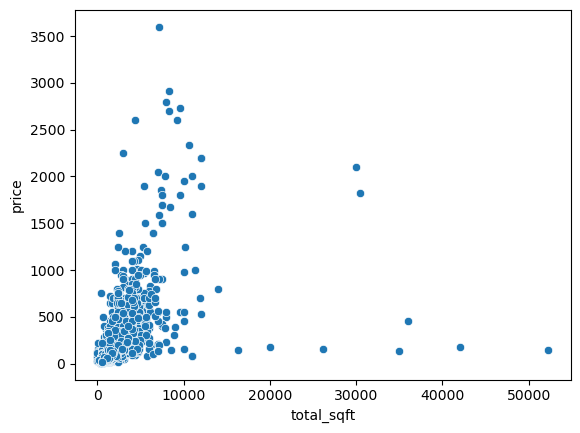

In [63]:
#totalsqft v/s size.
sns.scatterplot(x=df['total_sqft'],y=df['price'])
